# Xây dựng mô hình ARMA cho chuỗi dừng
#### 1. MÔ phỏng nhíễu trắng Gauss $a_t \sim WN(0,9)$ 



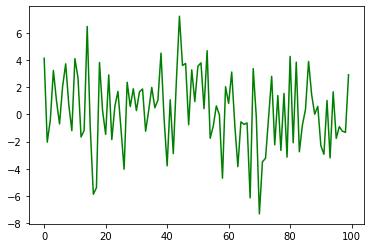

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 100
sigma = 3

# np.random.randn(n) sinh ra một số ngẫu nhiên theo luận phân phối chuẩn tắc
# Nhân với sigma thì phân phối at thành WN(0,9)
at = sigma*np.random.randn(n)

# HÌnh mô phỏng nhiễu trắng
plt.plot(at, color='green')
plt.show()



### Mô phỏng ACF của quá trình AR(1)
$$\rho_k =\phi^k$$

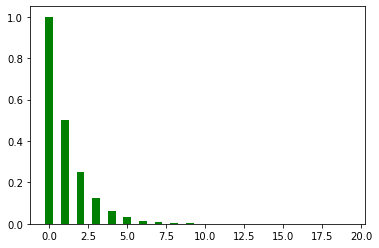

In [2]:
phi = 0.5
K = 20
x_axis = np.arange(K)
ACF = np.array([phi**j for j in range(K)])

plt.bar(x_axis, ACF, color='green', width=0.5)
plt.show()

## 
### MÔ PHỎNG QUÁ TRÌNH AR(2) VÀ TÍNH HÀM TỰ TƯƠNG QUAN RIÊNG PHẦN PACF

$$y_t = 0.4y_{t-1} + 0.5y_{t-2} +a_t$$
$$y_{0} = y_1 =0 $$
$$a_t \sim WN(0,25)$$

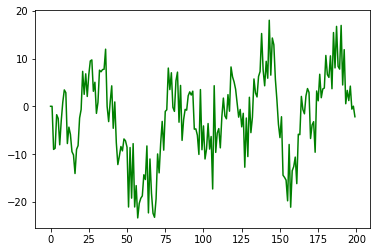

In [3]:
# Sinh dữ liệu quá trình AR(2)
N = 200
yt = np.zeros(N)
at = 5*np.random.randn(N)
for i in range(2,N):
    yt[i] = 0.4*yt[i-1] + 0.5*yt[i-2] + at[i]
    
plt.plot(yt, color= 'green')
plt.show()

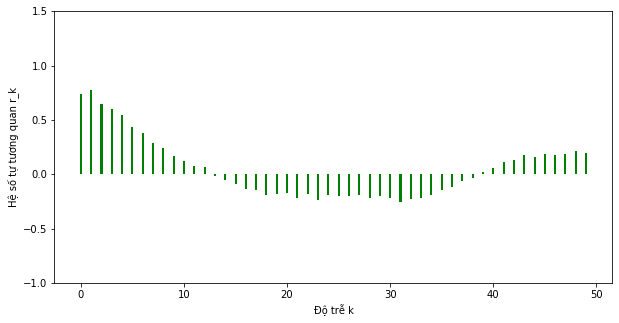

In [4]:
# TÍnh ACF
K = 50
ytb = yt.mean()
ACF = np.zeros(K)
c0 = np.sum((yt-ytb)**2)/N
for k in range(1,K+1):
    ck = np.sum((yt-ytb)[:N-k]*(yt-ytb)[k:N])/N
    rk = ACF[k-1] = ck/c0

# Vẽ đồ thị
fig = plt.figure(figsize = (10,5))
x = np.arange(K)
plt.bar(x, ACF, color='green', width = 0.2)
plt.xlabel("Độ trễ k")
plt.ylabel("Hệ số tự tương quan r_k")
plt.ylim([-1,1.5])
plt.show()


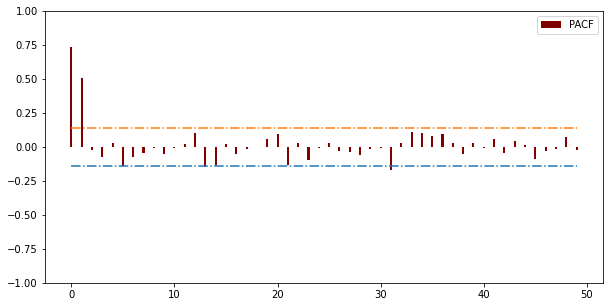

In [5]:
# TÍnh PACF = các hệ số tương quan riêng phần
PACF = np.zeros(K)
for m in range(1,K+1):
    P = np.eye(m)
    for i in range(m):
        for j in range(i):
            P[i,j] = ACF[i-j-1]
        for j in range(i+1,m):
            P[i,j] = ACF[j-i-1];
    PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]

PACF
#Ve do thi

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, PACF, color='maroon', width=0.2, label='PACF')
ax.plot(x,-2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.plot(x,2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.set_ylim([-1,1])
plt.legend()
plt.show()

## 
## Mô phỏng quá trình MA(1)
$$y_t = a_t-\theta\,a_{t-1}, \ \ \ a_t \sim WN(0,25)$$

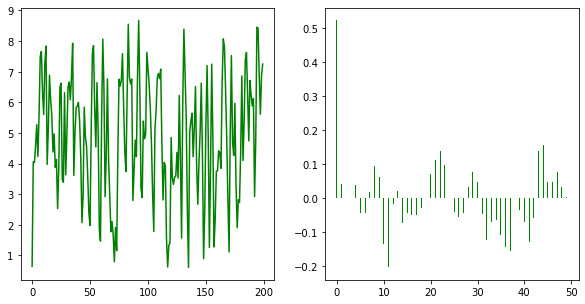

In [6]:
#SInh dữ liệu
N = 200;
theta = -0.8
at = 5*np.random.rand(N+1)
yt = np.array([at[i]-theta*at[i-1] for i in range(1,N+1)])

# TÍnh ACF
K = 50
ytb = yt.mean()
ACF = np.zeros(K)
c0 = np.sum((yt-ytb)**2)/N
for k in range(1,K+1):
    ck = np.sum((yt-ytb)[:N-k]*(yt-ytb)[k:N])/N
    rk = ACF[k-1] = ck/c0

# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,5))
x = np.arange(K)
ax[0].plot(yt, color='green')
ax[1].bar(x, ACF, color='green', width = 0.2)

plt.show()

###  
### 
##  
## Định nghĩa hàm ACF và PACF

In [7]:
# Dinh nghia ham ACF va PACF
def sACF(y,K):
    T = len(y)
    ytb = y.mean()
    ACF = np.zeros(K)
    c0 = np.sum((y-ytb)**2)/T
    for k in range(1, K+1):
        ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
        ACF[k-1]= ck/c0
    
    se_ACF = np.zeros(K)
    for i in range(K):
        se_ACF[i] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)))
    return ACF, se_ACF

def sPACF(y,K):
    T = len(y)
    #Lay day dau tien
    ACF = sACF(y,K)[0]
    PACF = np.zeros(K)
    for m in range(1,K+1):
        P = np.eye(m)
        for i in range(m):
            for j in range(i):
                P[i,j] = ACF[i-j-1]
            for j in range(i+1,m):
                P[i,j] = ACF[j-i-1];
        PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]
    se_PACF = np.array([1/np.sqrt(T) for i in range(K)])
    return PACF, se_PACF



## 
##  Mô hình hoá chỉ số NAO (North Atlantic Oscillation)

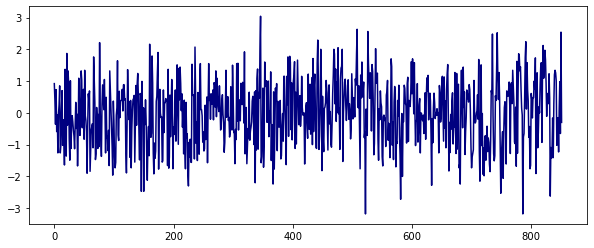

In [8]:

#Load dữ liệu
NAOindex = pd.read_csv('data/NAO.csv')

# biến thành 1 mảng 1 chiều
y = NAOindex.drop(['Year'], axis=1).to_numpy().flatten()

#Vẽ biểu đồ chỉ số NAO
plt.subplots(figsize = (10,4))
plt.plot(y, color='navy')
plt.show()

### Nhận xét: giống nhiễu trắng, có thể khác nhưng bậc không quá cao


In [9]:
# Tính trung bình, phương sai của chuỗi yi
T = len(y)
ytb = y.mean()
var_yt = np.sum((y-ytb)**2)/T
print("Trung bình = %f, phương sai = %f" %(ytb, var_yt))

Trung bình = 0.000458, phương sai = 1.043730


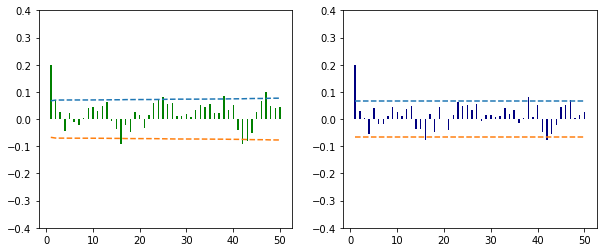

In [10]:
K = 50
# TÍnh ACF: rk và se_(rk)
#se la sai so tieu chuan

ACF, se_ACF = sACF(y, K)

# ytb = y.mean()
# ACF = np.zeros(K)
# c0 = np.sum((yt-ytb)**2)/T
# for k in range(1,K+1):
#     ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
#     rk = ACF[k-1] = ck/c0

# # Tính se_ACF
# se_ACF = np.zeros(K)
# for i in range(1,K+1):
#     se_ACF[i-1] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)));

#Tinh PACF pkk và se(pkk) (sai so tieu chuan)

PACF, se_PACF = sPACF(y,K)

# PACF = np.zeros(K)
# for m in range(1,K+1):
#     P = np.eye(m)
#     for i in range(m):
#         for j in range(i):
#             P[i,j] = ACF[i-j-1]
#         for j in range(i+1,m):
#             P[i,j] = ACF[j-i-1];
#     PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]

# #se_PACF
# se_PACF = np.array([1/np.sqrt(T) for i in range(K)])


# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1,K+1)
ax[0].bar(x, ACF, color='green', width = 0.3, label='ACF')
ax[0].plot(x, 1.96*se_ACF, linestyle='dashed')
ax[0].plot(x, -1.96*se_ACF, linestyle='dashed')
ax[0].set_ylim([-0.4, 0.4])


ax[1].bar(x, PACF, color='navy', width = 0.3, label='PACF')
ax[1].plot(x, 1.96*se_PACF, linestyle='dashed')
ax[1].plot(x, -1.96*se_PACF, linestyle='dashed')
ax[1].set_ylim([-0.4, 0.4])

plt.show()


#### => khác 0 không đáng kể từ độ trễ k = 1,2,3,....
#### => NAO có thể là quá trình
* AR(1): $y_t = \phi y_{t-1} + a_t$ với  $a_t \sim WN(0,\sigma^2)$

* MA(1): $y_t = a_t - \theta a_{t-1}$ với  $a_t \sim WN(0,\sigma^2)$

## Ước lượng mô hình AR(1) cho NAO
$$y_t = \phi y_{t-1} + a_t$$
$$a_t \sim WN(0, \sigma^2)$$

In [33]:
# ƯỚc lượng tham số
from sklearn.linear_model import LinearRegression
xdata = y[:-1]
ydata = y[1:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


Tham so beta [0.93069227]
Sai số tiêu chuẩn của beta [0.02048124]
Sigma =  36.709925044782246


In [12]:
#Đánh giá mô hình bằng hệ số xác định (R^2) và thống kê Q(k)
#biến thiên sai số
SE = np.sum(at**2)
# biến thiên tổng thể
ST = np.sum((ydata - ydata.mean())**2)

R2 = 1 - SE/ST
# R2 giải thích độ biến thiên của 4% dữ liệu
print('R2', R2)



R2 0.04011194477254687


=> Mô hình chỉ giải thích được biến thiên của 4% dữ liệu

In [13]:
# Tính thống kê Q(k)
def Qstat(at,k):
    at_ACF = sACF(at,k)[0]
    n = len(at)
    Qstat = 0
    for i in range(k):
        Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
    return Qstat

k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(at,k)))
    


Giá trị thống kê Q(12) = 8.571582


Nếu $a_t$ là nhiễu trắng Gauss, thì $Q(k) \sim \chi^2(k-1)$. Với $Q(12)=8.571582$, ta tính được p-value = 0.66137 => với mức ý nghĩa 5%, ta chấp nhận rằng $a_t$ là nhiễu trắng.

### Ước lượng mô hình MA(1) cho dữ liệu NAO:
 $$y_t = a_t - \theta a_{t-1}$$ với  $$a_t \sim WN(0,\sigma^2)$$
 
 Để tính tham số $\theta$, ta sử dụng $\widehat{a}_t$ tính được từ mô hình AR(1). Khi đó, ta tìm $\theta$ từ phương trình hồi quy:
 $$y_t = - \theta \widehat{a}_{t-1} + a_t $$
 

In [14]:
# ƯỚc lượng tham số
from sklearn.linear_model import LinearRegression
xdata = at[:-1]
ydata = y[2:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
e = ydata - model.predict(X)
sigma = np.sqrt(np.sum(e**2)/(len(e)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


Tham so beta [0.19378662]
Sai số tiêu chuẩn của beta [0.03440298]
Sigma =  1.0042619079250648


In [15]:
# Đánh giá mô hình bằng hệ số xác định R^2
SE = np.sum(e**2)
ST = np.sum((ydata -ydata.mean())**2)
R2 = 1 - SE/ST
print('R2 =',  R2)

R2 = 0.03602465826261414


In [16]:
# Tính thống kê Q(k)
# def Qstat(at,k):
#     at_ACF = sACF(at,k)[0]
#     n = len(at)
#     Qstat = 0
#     for i in range(k):
#         Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
#     return Qstat
k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(e,k)))

Giá trị thống kê Q(12) = 12.065169


# 
# 
#  
#  Đối với dữ liệu weekly loan applications
### Mô hình hoá dữ liệu *"weekly loan applications"
trong textbook "INTRODUCTION TO TIME SERIES ANALYSIS AND FORECASTING" , trang 370

In [17]:
# Đọc dữ liệu
loan = pd.read_csv('data/370-forecasting-book.csv')
y = loan['Applications'].values
y

array([71, 57, 62, 64, 65, 67, 65, 82, 70, 74, 75, 81, 71, 75, 82, 74, 78,
       75, 73, 76, 66, 69, 63, 76, 65, 73, 62, 77, 76, 88, 71, 72, 66, 65,
       73, 76, 81, 84, 68, 63, 66, 71, 67, 69, 63, 61, 68, 75, 66, 81, 72,
       77, 66, 71, 59, 57, 66, 51, 59, 56, 57, 55, 53, 74, 64, 70, 74, 69,
       64, 68, 64, 70, 73, 59, 68, 59, 66, 63, 63, 61, 73, 72, 65, 70, 54,
       63, 62, 60, 67, 59, 74, 61, 61, 52, 55, 61, 56, 61, 60, 65, 55, 61,
       59, 63])

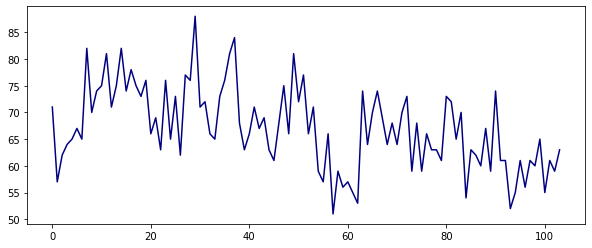

104

In [18]:
# Vẽ biểu đồ chuỗi số
plt.subplots(figsize = (10,4))
plt.plot(y, color='navy')
plt.show()

N = len(y)
N

In [19]:
# Tính trung bình, phương sai, độ lệch tiêu chuẩn của chuỗi yi
T = len(y)
ytb = y.mean()
var_yt = np.sum((y-ytb)**2)/T
s_y = np.sqrt(var_yt)
print("Trung bình = %f, phương sai = %f" %(ytb, var_yt))
print("Độ lêch tiêu chuẩn = %f" %(s_y))

Trung bình = 67.067308, phương sai = 58.735854
Độ lêch tiêu chuẩn = 7.663932


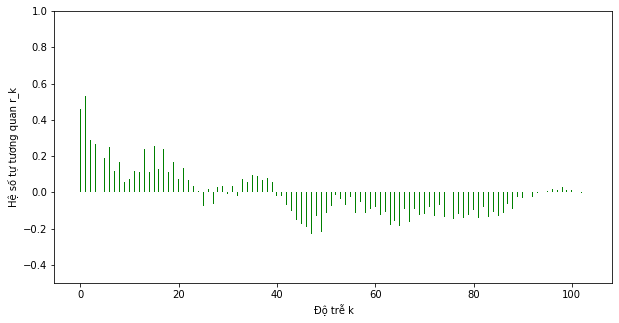

In [20]:
# MÔ PHỎNG QUÁ TRÌNH AR(2) VÀ TÍNH HÀM TỰ TƯƠNG QUAN RIÊNG PHẦN PACF
K = len(y)
#TÍnh ACF
result = sACF(y,K)
ACF = result[0]
se_ACF = result[1]

# Vẽ đồ thị
fig = plt.figure(figsize = (10,5))
x = np.arange(K)
plt.bar(x, ACF, color='green', width = 0.2)
plt.xlabel("Độ trễ k")
plt.ylabel("Hệ số tự tương quan r_k")
plt.ylim([-0.5,1])
plt.show()

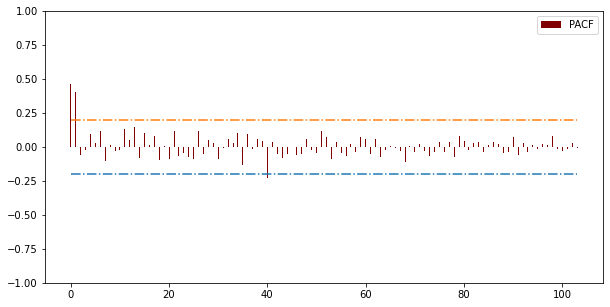

In [21]:
# TÍnh PACF = các hệ số tương quan riêng phần
result = sPACF(y,K)
PACF = result[0]
se_PACF = result[1]

PACF
#Ve do thi

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, PACF, color='maroon', width=0.2, label='PACF')
ax.plot(x,-2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.plot(x,2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.set_ylim([-1,1])
plt.legend()
plt.show()

Giá trị thống kê Q(12) = 8.571582


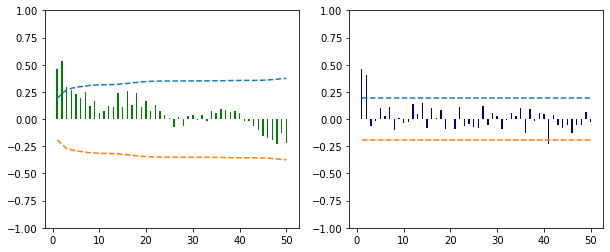

In [22]:
# Tính thống kê Q(k)
def Qstat(at,k):
    at_ACF = sACF(at,k)[0]
    n = len(at)
    Qstat = 0
    for i in range(k):
        Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
    return Qstat

k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(at,k)))
    
K = 50
# Tính ACF
ACF, se_ACF = sACF(y, K)
#Tinh PACF 
PACF, se_PACF = sPACF(y,K)

# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1,K+1)
# Đồ thị ACF
ax[0].bar(x, ACF, color='green', width = 0.3, label='ACF')
ax[0].plot(x, 1.96*se_ACF, linestyle='dashed')
ax[0].plot(x, -1.96*se_ACF, linestyle='dashed')
ax[0].set_ylim([-1, 1])
# Đồ thị PACF
ax[1].bar(x, PACF, color='navy', width = 0.3, label='PACF')
ax[1].plot(x, 1.96*se_PACF, linestyle='dashed')
ax[1].plot(x, -1.96*se_PACF, linestyle='dashed')
ax[1].set_ylim([-1, 1])

plt.show()

#### Dữ liệu có thể mô hình hoá bởi quá trình MA(2) hoặc MA(3) hoặc AR(2)
* Quá trình AR(2): $y_t = \theta_0 +\phi_1 y_{t-1} + \phi_2 y_{t-2} +a_t$
* Quá trình MA(2): $$y_t = \theta_0 + a_t +\theta_1 a_{t-1} + \theta_2 a_{t-2}$$

In [23]:
# ƯỚc lượng tham số mô hình AR(2)

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

ydata = y[2:] #ydata tu 2 tro di
n = len(ydata)
# Chuyển xdata thành ma trận
# y[1:-1]  chay tu 1 den -1
# y[0:-2]  chay tu 0 den -2
X = np.vstack([np.ones(n),y[1:-1], y[0:-2]]).T

#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
# theta0, phi1, phi2
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-3))
se_param = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


# Hiển thị dạng bảng
df = pd.DataFrame(np.vstack([model.coef_, se_param]).T,
                  columns= ['[parameters]', 'se(parameters)'])
df

Tham so beta [20.72518416  0.28380891  0.40733905]
Sai số tiêu chuẩn của beta [0.03440298]
Sigma =  6.2422220155737715


,[parameters],se(parameters)
0,20.725184,6.333543
1,0.283809,0.090223
2,0.407339,0.090604


In [24]:
# Đánh giá mô hình bằng hệ số xác định R^2
SE = np.sum(at**2)
ST = np.sum((ydata -ydata.mean())**2)
R2 = 1 - SE/ST
print('R2 =',  R2)

#Tính thống kê Q(k)
k = 24
print("Giá trị thống kê Q(%d)=%f"%(k, Qstat(at,k)))



R2 = 0.3561429974703262
Giá trị thống kê Q(24)=18.319282


In [25]:
# ƯỚc lượng tham số mô hình MA(3)
#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

ydata = y[5:] 
n = len(ydata)
X = np.vstack([np.ones(n),at[2:-1], at[1:-2], at[:-3]]).T
model.fit(X,ydata)


# Sai số tiêu chuẩn của ước lượng tham số mô hình
e = ydata - model.predict(X)
sigma = np.sqrt(np.sum(e**2)/(len(e)-4))
se_param = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sigma = ", sigma)

 
# Hiển thị dạng bảng
df = pd.DataFrame(np.vstack([model.coef_, se_param]).T,
                  columns= ['parameters', 'se(parameters)'])
df

Sigma =  6.82157377335285


,parameters,se(parameters)
0,67.201603,0.685619
1,0.282893,0.110253
2,0.526283,0.110109
3,0.170128,0.110029


In [26]:
# Đánh giá mô hình bằng hệ số xác định R^2
SE = np.sum(e**2)
ST = np.sum((ydata -ydata.mean())**2)
R2 = 1 - SE/ST
print('R2 =',  R2)

#Tính thống kê Q(k)
k = 24
print("Giá trị thống kê Q(%d)=%f"%(k, Qstat(e,k)))

R2 = 0.2569793765373035
Giá trị thống kê Q(24)=51.360384


# 
# 
### MÔ hình hoá số vết đen mặt trời 

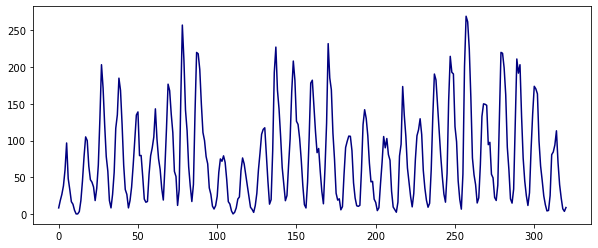

In [27]:
# Đọc dữ liệu
sunspot = pd.read_excel('data/sunspot.xls');
y = sunspot['Total sunspot number'].values


#Vẽ biểu đồ
plt.subplots(figsize = (10,4))
plt.plot(y, color='navy')
plt.show()

Trung bình = 78.518069, phương sai = 3843.200047
Độ lêch tiêu chuẩn = 61.993548


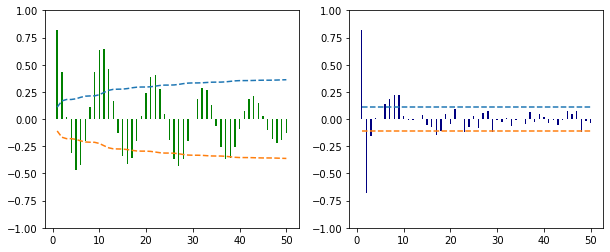

In [28]:
# Tính trung bình, phương sai, độ lệch tiêu chuẩn của chuỗi yi
T = len(y)
ytb = y.mean()
var_yt = np.sum((y-ytb)**2)/T
s_y = np.sqrt(var_yt)
print("Trung bình = %f, phương sai = %f" %(ytb, var_yt))
print("Độ lêch tiêu chuẩn = %f" %(s_y))

# Tính ACF: rk và se(rk) (sai số tiêu chuẩn)
K = 50
ACF, se_ACF = sACF(y,K)

# Tính PACF: Pkk và se(pkk) (sai số tiêu chuẩn)
PACF, se_PACF = sPACF(y,K)

# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1,K+1)
ax[0].bar(x, ACF, color='green', width = 0.3, label='ACF')
ax[0].plot(x, 1.96*se_ACF, linestyle='dashed')
ax[0].plot(x, -1.96*se_ACF, linestyle='dashed')
ax[0].set_ylim([-1, 1])


ax[1].bar(x, PACF, color='navy', width = 0.3, label='PACF')
ax[1].plot(x, 1.96*se_PACF, linestyle='dashed')
ax[1].plot(x, -1.96*se_PACF, linestyle='dashed')
ax[1].set_ylim([-1, 1])

plt.show()


In [37]:
# S.dụng t/c thông tin để chọn bậc cho q.trình AR(p)

def Informatic_Criterion(y,p):
    #Fit mô hình AR(p) với dữ liệu y
    model = LinearRegression(fit_intercept=False)
    ydata = y[p:]
    n = len(ydata)
    X = np.ones(n)
    for i in range(1,p+1):  
        X = np.vstack([X,y[p-i:-i]])
    X = X.T
    model.fit(X,ydata)
    
    # Tính ước lượng sigma
    at = ydata - model.predict(X)
    sigma = np.sqrt(np.sum(at**2)/(len(at)-p-1))
    
    # Trả về tiêu chuẩn thông tin aic
    aic = np.log(sigma**2) + 2/n*p
    bic = np.log(sigma**2) + np.log(n)/n*p
    return aic, bic


In [45]:
k = 20
aic = np.zeros(k)
bic = np.zeros(k)
for p in range(1,20):
    aic[p-1], bic[p-1] = Informatic_Criterion(y,p)

df = pd.DataFrame(np.vstack([np.arange(1,k+1),aic, bic]).T,
                  columns = ['k','AIC','BIC'])
df

,k,AIC,BIC
0,1.0,7.155748,7.167524
1,2.0,6.514755,6.538361
2,3.0,6.505185,6.540676
3,4.0,6.516872,6.564303
4,5.0,6.529642,6.589068
5,6.0,6.521701,6.593179
6,7.0,6.469803,6.553388
7,8.0,6.432203,6.527953
8,9.0,6.393805,6.501776
9,10.0,6.406524,6.526774


### => bậc của quá trình AR bằng 9
$$y_t = \theta_0 + \sum_{i=1}^9\phi_i y_{t-i}+at$$

In [46]:
# Ước lượng tham số mô hình AR(9)
model = LinearRegression(fit_intercept=False)

ydata = y[9:] #ydata tu 9 tro di
n = len(ydata)
X = np.ones(n)
for i in range(1,10):
    X = np.vstack([X,y[9-i:-i]])
X = X.T
model.fit(X, ydata)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-3))
se_param = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


# Hiển thị dạng bảng
df = pd.DataFrame(np.vstack([model.coef_, se_param]).T,
                  columns= ['[parameters]', 'se(parameters)'])
df


Sai số tiêu chuẩn của beta [0.02048124]
Sigma =  23.490576456309103


,[parameters],se(parameters)
0,12.225337,4.078891
1,1.170218,0.055469
2,-0.419324,0.086586
3,-0.132726,0.089358
4,0.102342,0.088911
5,-0.068406,0.088825
6,0.002390,0.088805
7,0.021711,0.088842
8,-0.050242,0.085902
9,0.221874,0.055072


In [50]:
# Hiệu chỉnh mô hình bằng cách bỏ đi các tham số từ phi3 đến phi 8
model = LinearRegression(fit_intercept=False)
ydata = y[9:]
n = len(ydata)
X = np.vstack([np.ones(n), y[8:-1], y[7:-2], y[:-9]]).T
model.fit(X, ydata)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-4))
se_param = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print('sigma =', sigma)

# Hiển thị dạng bảng
df = pd.DataFrame(np.vstack([model.coef_, se_param]).T,
                  columns= ['[parameters]', 'se(parameters)'])
df


sigma = 23.696038403526796


,[parameters],se(parameters)
0,8.600032,3.101629
1,1.223042,0.043502
2,-0.522565,0.044239
3,0.192725,0.025591


In [54]:
# Đánh giá mô hình bằng hệ số xác định R^2
SE = np.sum(at**2)
ST = np.sum((ydata -ydata.mean())**2)
R2 = 1 - SE/ST
print('R^2 =',  R2)

#Tính thống kê Q(k)
k = 24
print("Giá trị thống kê Q(%d)=%f"%(k, Qstat(at,k)))

R^2 = 0.8574185376608272
Giá trị thống kê Q(24)=22.518430


#### p value = 0.094913528 => chấp nhận mô hình ở mức ý nghĩa 5%

In [ ]:
from scipy.optimize import f